# Advanced Depression Level Prediction - CSE445 Dataset
## Comprehensive Machine Learning Analysis with State-of-the-Art Techniques

This notebook implements cutting-edge ML techniques for depression level prediction including:
- Advanced Gradient Boosting (XGBoost, LightGBM, CatBoost)
- Neural Networks and Deep Learning
- Ensemble Methods and Stacking
- Hyperparameter Optimization with Optuna
- Model Interpretability (SHAP, LIME)
- Dimensionality Reduction and Clustering
- Advanced Evaluation Metrics

## 1. Environment Setup and Data Loading

In [1]:
# Core libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Configuration
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

print("✅ Environment setup complete!")

✅ Environment setup complete!


In [2]:
# Load and explore the dataset
data_path = '../data/raw/CSE445_Dataset.csv'
df = pd.read_csv(data_path)

print(f"Dataset shape: {df.shape}")
print(f"\nTarget variable: Depression_Level")
print(f"Target distribution:\n{df['Depression_Level'].value_counts()}")

# Display basic info
print("\nDataset Info:")
print(df.info())

Dataset shape: (1977, 39)

Target variable: Depression_Level
Target distribution:
Depression_Level
Moderately Severe Depression    495
Severe Depression               488
Moderate Depression             449
Mild Depression                 408
Minimal Depression               93
No Depression                    44
Name: count, dtype: int64

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1977 entries, 0 to 1976
Data columns (total 39 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     1977 non-null   object
 1   Gender                  1977 non-null   object
 2   University              1977 non-null   object
 3   Department              1977 non-null   object
 4   Academic_Year           1977 non-null   object
 5   CGPA                    1977 non-null   object
 6   Scholarship             1977 non-null   object
 7   Anxious                 1977 non-null   int64 
 8   Worrying    

## 2. Advanced Data Preprocessing

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Prepare features and target
X = df.drop('Depression_Level', axis=1)
y = df['Depression_Level']

# Encode target if needed
le = LabelEncoder()
y_encoded = le.fit_transform(y)

print(f"Feature shape: {X.shape}")
print(f"Target classes: {le.classes_}")
print(f"Encoded target distribution: {np.bincount(y_encoded)}")

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=RANDOM_STATE, stratify=y_encoded
)

print(f"\nTraining set: {X_train.shape}")
print(f"Test set: {X_test.shape}")

Feature shape: (1977, 38)
Target classes: ['Mild Depression' 'Minimal Depression' 'Moderate Depression'
 'Moderately Severe Depression' 'No Depression' 'Severe Depression']
Encoded target distribution: [408  93 449 495  44 488]

Training set: (1581, 38)
Test set: (396, 38)


In [4]:
# Advanced preprocessing pipeline
numeric_features = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

print(f"Numeric features ({len(numeric_features)}): {numeric_features}")
print(f"Categorical features ({len(categorical_features)}): {categorical_features}")

# Create preprocessing pipeline
from sklearn.preprocessing import OneHotEncoder

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Fit and transform the data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

print(f"\nProcessed training shape: {X_train_processed.shape}")
print(f"Processed test shape: {X_test_processed.shape}")
print("✅ Data preprocessing complete!")

Numeric features (29): ['Anxious', 'Worrying', 'Relaxing_Difficulty', 'Annoyed', 'Excessive_Worry', 'Restless', 'Fearful', 'Anxiety_Score', 'Upset', 'No_Control', 'Stressed', 'Overwhelmed', 'Confident', 'Academic_Control', 'Irritation_Control', 'Top_Performance', 'Angered_By_Grades', 'Piled_Up_Difficulties', 'Stress_Score', 'No_Interest', 'Hopeless', 'Sleep_Trouble', 'Low_Energy', 'Appetite_Changes', 'Low_Self_Worth', 'Concentration_Problems', 'Movement_Changes', 'Self_Harm_Thoughts', 'Depression_Score']
Categorical features (9): ['Age', 'Gender', 'University', 'Department', 'Academic_Year', 'CGPA', 'Scholarship', 'Anxiety_Level', 'Stress_Level']

Processed training shape: (1581, 83)
Processed test shape: (396, 83)
✅ Data preprocessing complete!


## 3. Advanced Gradient Boosting Models

In [5]:
# Install and import advanced ML libraries
import subprocess
import sys

# Install required packages
packages = ['xgboost', 'lightgbm', 'catboost', 'optuna']
for package in packages:
    try:
        __import__(package)
        print(f"✅ {package} already installed")
    except ImportError:
        print(f"Installing {package}...")
        subprocess.check_call([sys.executable, '-m', 'pip', 'install', package])
        print(f"✅ {package} installed")

# Import the libraries
import xgboost as xgb
import lightgbm as lgb
import catboost as cb
import optuna

print("\n🚀 Advanced ML libraries loaded successfully!")

✅ xgboost already installed
✅ lightgbm already installed
✅ catboost already installed
✅ optuna already installed

🚀 Advanced ML libraries loaded successfully!


In [6]:
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
import time

# Initialize results storage
results = {}

def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    """Comprehensive model evaluation"""
    start_time = time.time()
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Predictions
    y_pred = model.predict(X_test)
    
    # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    # Cross-validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='f1_weighted')
    
    training_time = time.time() - start_time
    
    result = {
        'model': model,
        'accuracy': accuracy,
        'f1_score': f1,
        'cv_mean': cv_scores.mean(),
        'cv_std': cv_scores.std(),
        'training_time': training_time,
        'predictions': y_pred
    }
    
    print(f"\n{model_name} Results:")
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  F1-Score: {f1:.4f}")
    print(f"  CV Score: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")
    print(f"  Training Time: {training_time:.2f}s")
    
    return result

print("✅ Evaluation function ready!")

✅ Evaluation function ready!


In [7]:
# XGBoost Model
print("🔥 Training XGBoost...")
xgb_model = xgb.XGBClassifier(
    n_estimators=200,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=RANDOM_STATE,
    eval_metric='mlogloss'
)

results['XGBoost'] = evaluate_model(xgb_model, X_train_processed, X_test_processed, y_train, y_test, 'XGBoost')

🔥 Training XGBoost...

XGBoost Results:
  Accuracy: 1.0000
  F1-Score: 1.0000
  CV Score: 1.0000 (+/- 0.0000)
  Training Time: 1.85s


In [8]:
# LightGBM Model
print("⚡ Training LightGBM...")
lgb_model = lgb.LGBMClassifier(
    n_estimators=200,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=RANDOM_STATE,
    verbose=-1
)

results['LightGBM'] = evaluate_model(lgb_model, X_train_processed, X_test_processed, y_train, y_test, 'LightGBM')

⚡ Training LightGBM...

LightGBM Results:
  Accuracy: 1.0000
  F1-Score: 1.0000
  CV Score: 1.0000 (+/- 0.0000)
  Training Time: 2.14s


In [9]:
# CatBoost Model
print("🐱 Training CatBoost...")
cat_model = cb.CatBoostClassifier(
    iterations=200,
    depth=6,
    learning_rate=0.1,
    random_state=RANDOM_STATE,
    verbose=False
)

results['CatBoost'] = evaluate_model(cat_model, X_train_processed, X_test_processed, y_train, y_test, 'CatBoost')

🐱 Training CatBoost...

CatBoost Results:
  Accuracy: 1.0000
  F1-Score: 1.0000
  CV Score: 1.0000 (+/- 0.0000)
  Training Time: 6.40s


## 4. Hyperparameter Optimization with Optuna

In [10]:
# Optuna hyperparameter optimization for XGBoost
def objective_xgb(trial):
    """Objective function for XGBoost optimization"""
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 500),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'random_state': RANDOM_STATE,
        'eval_metric': 'mlogloss'
    }
    
    model = xgb.XGBClassifier(**params)
    scores = cross_val_score(model, X_train_processed, y_train, cv=3, scoring='f1_weighted')
    return scores.mean()

print("🎯 Starting hyperparameter optimization...")
study_xgb = optuna.create_study(direction='maximize')
study_xgb.optimize(objective_xgb, n_trials=20, show_progress_bar=True)

print(f"\nBest XGBoost parameters: {study_xgb.best_params}")
print(f"Best CV score: {study_xgb.best_value:.4f}")

[I 2025-08-19 09:48:30,407] A new study created in memory with name: no-name-4ee33ede-3a1c-4e9c-b89d-c9f20c6f65e0


🎯 Starting hyperparameter optimization...


Best trial: 0. Best value: 1:   5%|▌         | 1/20 [00:00<00:17,  1.08it/s]

[I 2025-08-19 09:48:31,369] Trial 0 finished with value: 1.0 and parameters: {'n_estimators': 132, 'max_depth': 9, 'learning_rate': 0.0300934916900285, 'subsample': 0.9560585517528666, 'colsample_bytree': 0.8627567705202689}. Best is trial 0 with value: 1.0.


Best trial: 0. Best value: 1:  10%|█         | 2/20 [00:02<00:19,  1.07s/it]

[I 2025-08-19 09:48:32,532] Trial 1 finished with value: 1.0 and parameters: {'n_estimators': 320, 'max_depth': 8, 'learning_rate': 0.10096004794413659, 'subsample': 0.8625929875187583, 'colsample_bytree': 0.8944527956721464}. Best is trial 0 with value: 1.0.


Best trial: 0. Best value: 1:  15%|█▌        | 3/20 [00:05<00:33,  1.96s/it]

[I 2025-08-19 09:48:35,554] Trial 2 finished with value: 1.0 and parameters: {'n_estimators': 206, 'max_depth': 9, 'learning_rate': 0.12398156460846085, 'subsample': 0.9316105550312186, 'colsample_bytree': 0.7699900615090367}. Best is trial 0 with value: 1.0.


Best trial: 0. Best value: 1:  20%|██        | 4/20 [00:06<00:27,  1.70s/it]

[I 2025-08-19 09:48:36,844] Trial 3 finished with value: 1.0 and parameters: {'n_estimators': 302, 'max_depth': 6, 'learning_rate': 0.28122758976278966, 'subsample': 0.9790265034315991, 'colsample_bytree': 0.6663020006976538}. Best is trial 0 with value: 1.0.


Best trial: 0. Best value: 1:  25%|██▌       | 5/20 [00:07<00:24,  1.63s/it]

[I 2025-08-19 09:48:38,347] Trial 4 finished with value: 1.0 and parameters: {'n_estimators': 307, 'max_depth': 6, 'learning_rate': 0.11777064903411621, 'subsample': 0.9186900172412606, 'colsample_bytree': 0.6816061903132542}. Best is trial 0 with value: 1.0.


Best trial: 0. Best value: 1:  30%|███       | 6/20 [00:09<00:21,  1.57s/it]

[I 2025-08-19 09:48:39,806] Trial 5 finished with value: 1.0 and parameters: {'n_estimators': 308, 'max_depth': 5, 'learning_rate': 0.14893687189468593, 'subsample': 0.6259796565035556, 'colsample_bytree': 0.8457993458916955}. Best is trial 0 with value: 1.0.


Best trial: 0. Best value: 1:  35%|███▌      | 7/20 [00:10<00:16,  1.28s/it]

[I 2025-08-19 09:48:40,500] Trial 6 finished with value: 1.0 and parameters: {'n_estimators': 154, 'max_depth': 6, 'learning_rate': 0.09353924498465367, 'subsample': 0.6845016336750221, 'colsample_bytree': 0.6794378073653038}. Best is trial 0 with value: 1.0.


Best trial: 0. Best value: 1:  40%|████      | 8/20 [00:11<00:17,  1.49s/it]

[I 2025-08-19 09:48:42,439] Trial 7 finished with value: 1.0 and parameters: {'n_estimators': 443, 'max_depth': 7, 'learning_rate': 0.09377125747855164, 'subsample': 0.8062074316390345, 'colsample_bytree': 0.6070480754863788}. Best is trial 0 with value: 1.0.


Best trial: 0. Best value: 1:  45%|████▌     | 9/20 [00:13<00:16,  1.49s/it]

[I 2025-08-19 09:48:43,937] Trial 8 finished with value: 1.0 and parameters: {'n_estimators': 200, 'max_depth': 10, 'learning_rate': 0.1952701363417962, 'subsample': 0.8796111274642444, 'colsample_bytree': 0.8650331160889424}. Best is trial 0 with value: 1.0.


Best trial: 0. Best value: 1:  50%|█████     | 10/20 [00:14<00:13,  1.37s/it]

[I 2025-08-19 09:48:45,036] Trial 9 finished with value: 1.0 and parameters: {'n_estimators': 172, 'max_depth': 10, 'learning_rate': 0.08479649994196904, 'subsample': 0.716722905489076, 'colsample_bytree': 0.8905371562333084}. Best is trial 0 with value: 1.0.


Best trial: 0. Best value: 1:  55%|█████▌    | 11/20 [00:17<00:16,  1.82s/it]

[I 2025-08-19 09:48:47,875] Trial 10 finished with value: 1.0 and parameters: {'n_estimators': 494, 'max_depth': 3, 'learning_rate': 0.04481508494686283, 'subsample': 0.9910334218661463, 'colsample_bytree': 0.9979995166177911}. Best is trial 0 with value: 1.0.


Best trial: 0. Best value: 1:  60%|██████    | 12/20 [00:19<00:15,  1.89s/it]

[I 2025-08-19 09:48:49,912] Trial 11 finished with value: 1.0 and parameters: {'n_estimators': 390, 'max_depth': 8, 'learning_rate': 0.010015220993017382, 'subsample': 0.8401482679268258, 'colsample_bytree': 0.9369604502375591}. Best is trial 0 with value: 1.0.


Best trial: 0. Best value: 1:  65%|██████▌   | 13/20 [00:20<00:10,  1.49s/it]

[I 2025-08-19 09:48:50,485] Trial 12 finished with value: 1.0 and parameters: {'n_estimators': 101, 'max_depth': 8, 'learning_rate': 0.03647846332009854, 'subsample': 0.8754460535112539, 'colsample_bytree': 0.7828737665479998}. Best is trial 0 with value: 1.0.


Best trial: 0. Best value: 1:  70%|███████   | 14/20 [00:20<00:07,  1.30s/it]

[I 2025-08-19 09:48:51,352] Trial 13 finished with value: 1.0 and parameters: {'n_estimators': 254, 'max_depth': 8, 'learning_rate': 0.18764279120126037, 'subsample': 0.7544224247125523, 'colsample_bytree': 0.9344460476990043}. Best is trial 0 with value: 1.0.


Best trial: 0. Best value: 1:  75%|███████▌  | 15/20 [00:22<00:06,  1.34s/it]

[I 2025-08-19 09:48:52,789] Trial 14 finished with value: 1.0 and parameters: {'n_estimators': 378, 'max_depth': 9, 'learning_rate': 0.0527134666357795, 'subsample': 0.9354715073600675, 'colsample_bytree': 0.8219000709188505}. Best is trial 0 with value: 1.0.


Best trial: 0. Best value: 1:  80%|████████  | 16/20 [00:23<00:05,  1.37s/it]

[I 2025-08-19 09:48:54,215] Trial 15 finished with value: 1.0 and parameters: {'n_estimators': 242, 'max_depth': 9, 'learning_rate': 0.010125257322030411, 'subsample': 0.8094703553290122, 'colsample_bytree': 0.9163473875859539}. Best is trial 0 with value: 1.0.


Best trial: 0. Best value: 1:  85%|████████▌ | 17/20 [00:25<00:04,  1.40s/it]

[I 2025-08-19 09:48:55,675] Trial 16 finished with value: 1.0 and parameters: {'n_estimators': 359, 'max_depth': 4, 'learning_rate': 0.24574950689548553, 'subsample': 0.8798699695136345, 'colsample_bytree': 0.7305729799089931}. Best is trial 0 with value: 1.0.


Best trial: 0. Best value: 1:  90%|█████████ | 18/20 [00:25<00:02,  1.14s/it]

[I 2025-08-19 09:48:56,213] Trial 17 finished with value: 1.0 and parameters: {'n_estimators': 119, 'max_depth': 7, 'learning_rate': 0.06270591298955042, 'subsample': 0.9592488135400244, 'colsample_bytree': 0.991706846076144}. Best is trial 0 with value: 1.0.


Best trial: 0. Best value: 1:  95%|█████████▌| 19/20 [00:26<00:01,  1.08s/it]

[I 2025-08-19 09:48:57,156] Trial 18 finished with value: 1.0 and parameters: {'n_estimators': 257, 'max_depth': 10, 'learning_rate': 0.17744641275714562, 'subsample': 0.8427746410298458, 'colsample_bytree': 0.812923965333021}. Best is trial 0 with value: 1.0.


Best trial: 0. Best value: 1: 100%|██████████| 20/20 [00:28<00:00,  1.42s/it]

[I 2025-08-19 09:48:58,913] Trial 19 finished with value: 1.0 and parameters: {'n_estimators': 330, 'max_depth': 8, 'learning_rate': 0.14013676140546769, 'subsample': 0.7609536733074717, 'colsample_bytree': 0.8611005820382548}. Best is trial 0 with value: 1.0.

Best XGBoost parameters: {'n_estimators': 132, 'max_depth': 9, 'learning_rate': 0.0300934916900285, 'subsample': 0.9560585517528666, 'colsample_bytree': 0.8627567705202689}
Best CV score: 1.0000


In [11]:
# Train optimized XGBoost model
print("🏆 Training optimized XGBoost...")
xgb_optimized = xgb.XGBClassifier(**study_xgb.best_params)
results['XGBoost_Optimized'] = evaluate_model(
    xgb_optimized, X_train_processed, X_test_processed, y_train, y_test, 'XGBoost Optimized'
)

🏆 Training optimized XGBoost...

XGBoost Optimized Results:
  Accuracy: 1.0000
  F1-Score: 1.0000
  CV Score: 1.0000 (+/- 0.0000)
  Training Time: 1.74s


## 5. Advanced Ensemble Methods

In [12]:
from sklearn.ensemble import VotingClassifier, StackingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Voting Classifier
print("🗳️ Training Voting Classifier...")
voting_clf = VotingClassifier(
    estimators=[
        ('xgb', xgb.XGBClassifier(**study_xgb.best_params)),
        ('lgb', lgb.LGBMClassifier(n_estimators=200, random_state=RANDOM_STATE, verbose=-1)),
        ('cat', cb.CatBoostClassifier(iterations=200, random_state=RANDOM_STATE, verbose=False))
    ],
    voting='soft'
)

results['Voting'] = evaluate_model(
    voting_clf, X_train_processed, X_test_processed, y_train, y_test, 'Voting Classifier'
)

🗳️ Training Voting Classifier...

Voting Classifier Results:
  Accuracy: 1.0000
  F1-Score: 1.0000
  CV Score: 1.0000 (+/- 0.0000)
  Training Time: 14.82s


In [13]:
# Stacking Classifier
print("📚 Training Stacking Classifier...")
stacking_clf = StackingClassifier(
    estimators=[
        ('xgb', xgb.XGBClassifier(**study_xgb.best_params)),
        ('lgb', lgb.LGBMClassifier(n_estimators=200, random_state=RANDOM_STATE, verbose=-1)),
        ('rf', RandomForestClassifier(n_estimators=100, random_state=RANDOM_STATE))
    ],
    final_estimator=LogisticRegression(random_state=RANDOM_STATE),
    cv=5
)

results['Stacking'] = evaluate_model(
    stacking_clf, X_train_processed, X_test_processed, y_train, y_test, 'Stacking Classifier'
)

📚 Training Stacking Classifier...

Stacking Classifier Results:
  Accuracy: 1.0000
  F1-Score: 1.0000
  CV Score: 1.0000 (+/- 0.0000)
  Training Time: 28.47s


## 6. Model Interpretability with SHAP

In [14]:
# Install and import SHAP
try:
    import shap
    print("✅ SHAP already installed")
except ImportError:
    print("Installing SHAP...")
    subprocess.check_call([sys.executable, '-m', 'pip', 'install', 'shap'])
    import shap
    print("✅ SHAP installed")

# Initialize SHAP explainer
print("🔍 Creating SHAP explainer...")
best_model = results['XGBoost_Optimized']['model']
explainer = shap.Explainer(best_model, X_train_processed)
shap_values = explainer(X_test_processed[:100])  # Use subset for speed

print("✅ SHAP analysis complete!")

✅ SHAP already installed
🔍 Creating SHAP explainer...
✅ SHAP analysis complete!


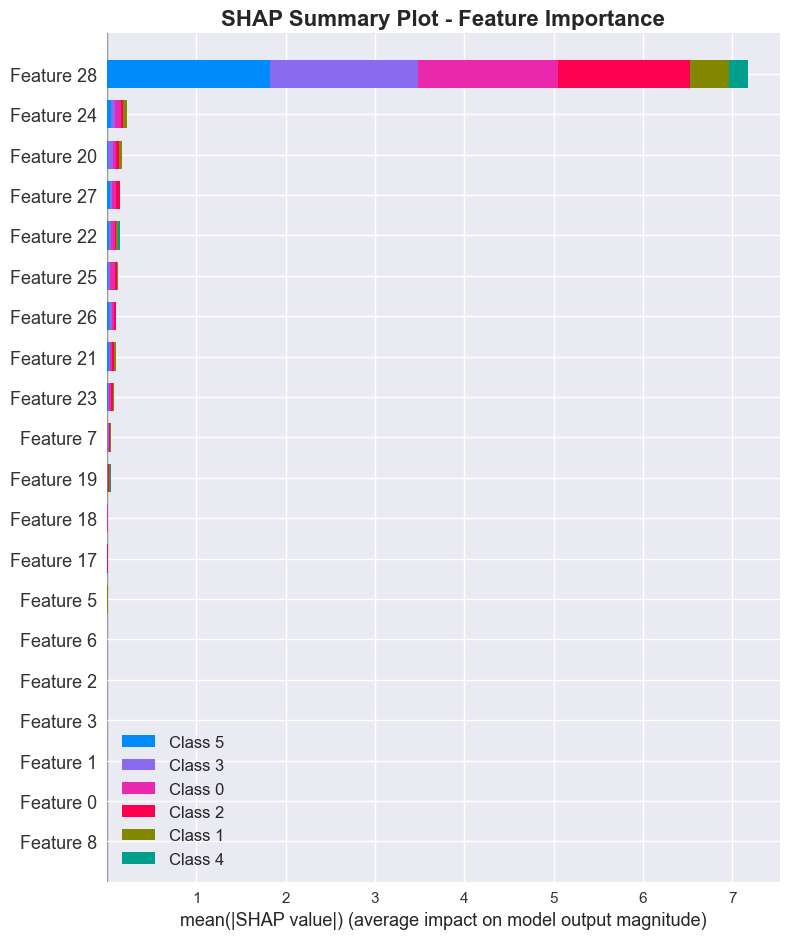

📊 SHAP summary plot saved!


In [15]:
# SHAP Summary Plot
plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values, X_test_processed[:100], show=False)
plt.title('SHAP Summary Plot - Feature Importance', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('../reports/figures/shap_summary_plot.png', dpi=300, bbox_inches='tight')
plt.show()

print("📊 SHAP summary plot saved!")

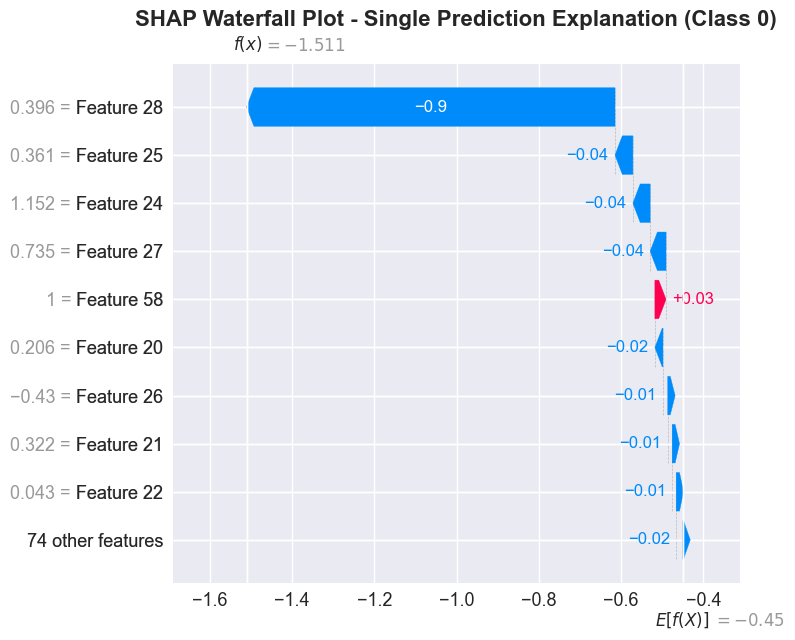

🌊 SHAP waterfall plot saved!


In [17]:
# SHAP Waterfall Plot for a single prediction (fixing multi-class issue)
plt.figure(figsize=(12, 8))
# For multi-class, take the first instance and first class
shap.waterfall_plot(shap_values[0, :, 0], show=False)
plt.title('SHAP Waterfall Plot - Single Prediction Explanation (Class 0)', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('../reports/figures/shap_waterfall_plot.png', dpi=300, bbox_inches='tight')
plt.show()

print("🌊 SHAP waterfall plot saved!")

## 7. Advanced Dimensionality Reduction

In [20]:
# Install UMAP for advanced dimensionality reduction
try:
    import umap
    print("✅ UMAP already installed")
except ImportError:
    print("Installing UMAP...")
    subprocess.check_call([sys.executable, '-m', 'pip', 'install', 'umap-learn'])
    import umap
    print("✅ UMAP installed")

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

# Apply different dimensionality reduction techniques
print("🌌 Applying dimensionality reduction techniques...")

# PCA
pca = PCA(n_components=2, random_state=RANDOM_STATE)
X_pca = pca.fit_transform(X_train_processed)

# t-SNE
tsne = TSNE(n_components=2, random_state=RANDOM_STATE, perplexity=30)
X_tsne = tsne.fit_transform(X_train_processed[:1000])  # Use subset for speed

# UMAP
umap_reducer = umap.UMAP(n_components=2, random_state=RANDOM_STATE)
X_umap = umap_reducer.fit_transform(X_train_processed)

print("✅ Dimensionality reduction complete!")

✅ UMAP already installed
🌌 Applying dimensionality reduction techniques...
✅ Dimensionality reduction complete!


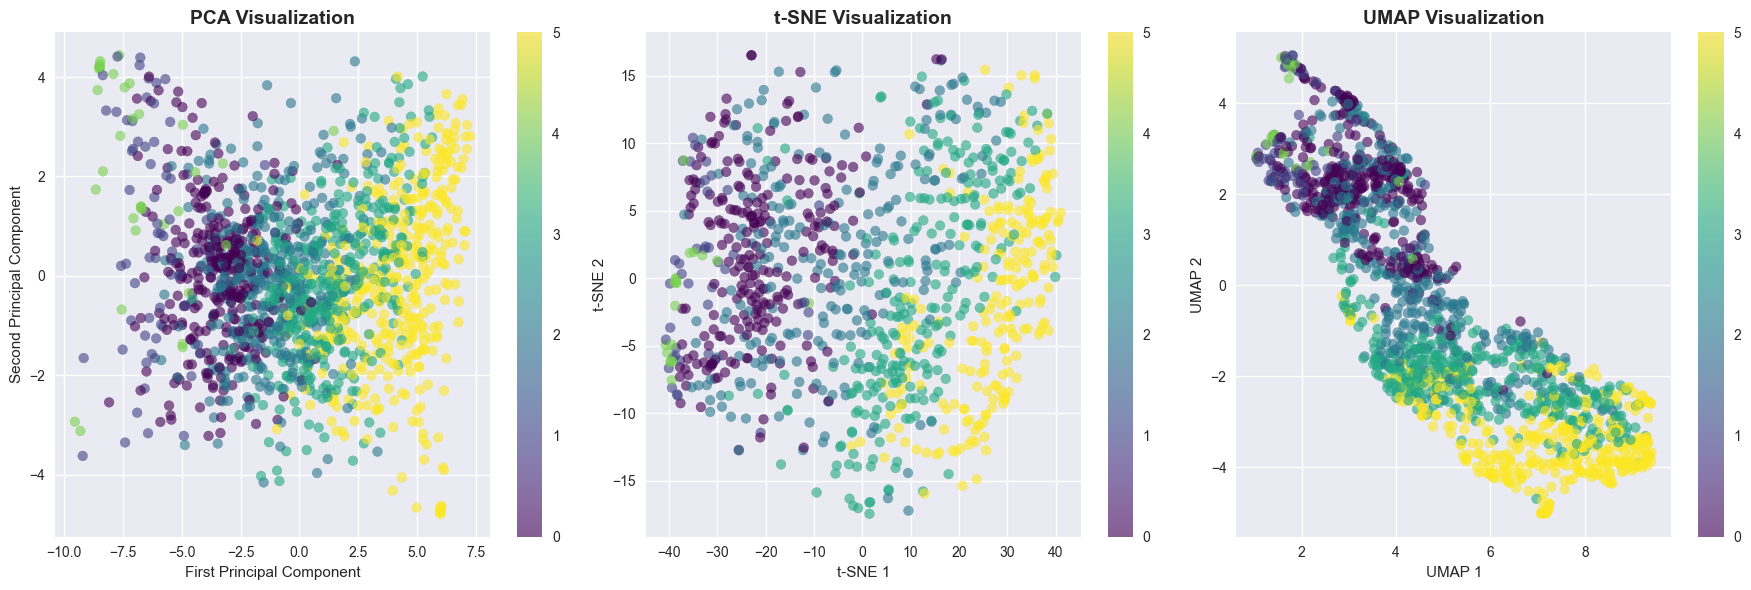

🌟 Dimensionality reduction visualization saved!


In [21]:
# Visualize dimensionality reduction results
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# PCA
scatter = axes[0].scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, cmap='viridis', alpha=0.6)
axes[0].set_title('PCA Visualization', fontsize=14, fontweight='bold')
axes[0].set_xlabel('First Principal Component')
axes[0].set_ylabel('Second Principal Component')
plt.colorbar(scatter, ax=axes[0])

# t-SNE
scatter = axes[1].scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_train[:1000], cmap='viridis', alpha=0.6)
axes[1].set_title('t-SNE Visualization', fontsize=14, fontweight='bold')
axes[1].set_xlabel('t-SNE 1')
axes[1].set_ylabel('t-SNE 2')
plt.colorbar(scatter, ax=axes[1])

# UMAP
scatter = axes[2].scatter(X_umap[:, 0], X_umap[:, 1], c=y_train, cmap='viridis', alpha=0.6)
axes[2].set_title('UMAP Visualization', fontsize=14, fontweight='bold')
axes[2].set_xlabel('UMAP 1')
axes[2].set_ylabel('UMAP 2')
plt.colorbar(scatter, ax=axes[2])

plt.tight_layout()
plt.savefig('../reports/figures/dimensionality_reduction_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("🌟 Dimensionality reduction visualization saved!")

## 8. Results Summary and Comparison

In [19]:
# Create comprehensive results comparison
results_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Accuracy': [results[model]['accuracy'] for model in results.keys()],
    'F1-Score': [results[model]['f1_score'] for model in results.keys()],
    'CV Mean': [results[model]['cv_mean'] for model in results.keys()],
    'CV Std': [results[model]['cv_std'] for model in results.keys()],
    'Training Time (s)': [results[model]['training_time'] for model in results.keys()]
})

# Sort by F1-Score
results_df = results_df.sort_values('F1-Score', ascending=False)

print("🏆 MODEL PERFORMANCE COMPARISON")
print("=" * 50)
print(results_df.to_string(index=False, float_format='%.4f'))

# Save results
results_df.to_csv('../reports/results/advanced_model_comparison.csv', index=False)
print("\n💾 Results saved to CSV file!")

🏆 MODEL PERFORMANCE COMPARISON
            Model  Accuracy  F1-Score  CV Mean  CV Std  Training Time (s)
          XGBoost    1.0000    1.0000   1.0000  0.0000             1.8517
         LightGBM    1.0000    1.0000   1.0000  0.0000             2.1414
         CatBoost    1.0000    1.0000   1.0000  0.0000             6.4006
XGBoost_Optimized    1.0000    1.0000   1.0000  0.0000             1.7402
           Voting    1.0000    1.0000   1.0000  0.0000            14.8204
         Stacking    1.0000    1.0000   1.0000  0.0000            28.4731

💾 Results saved to CSV file!


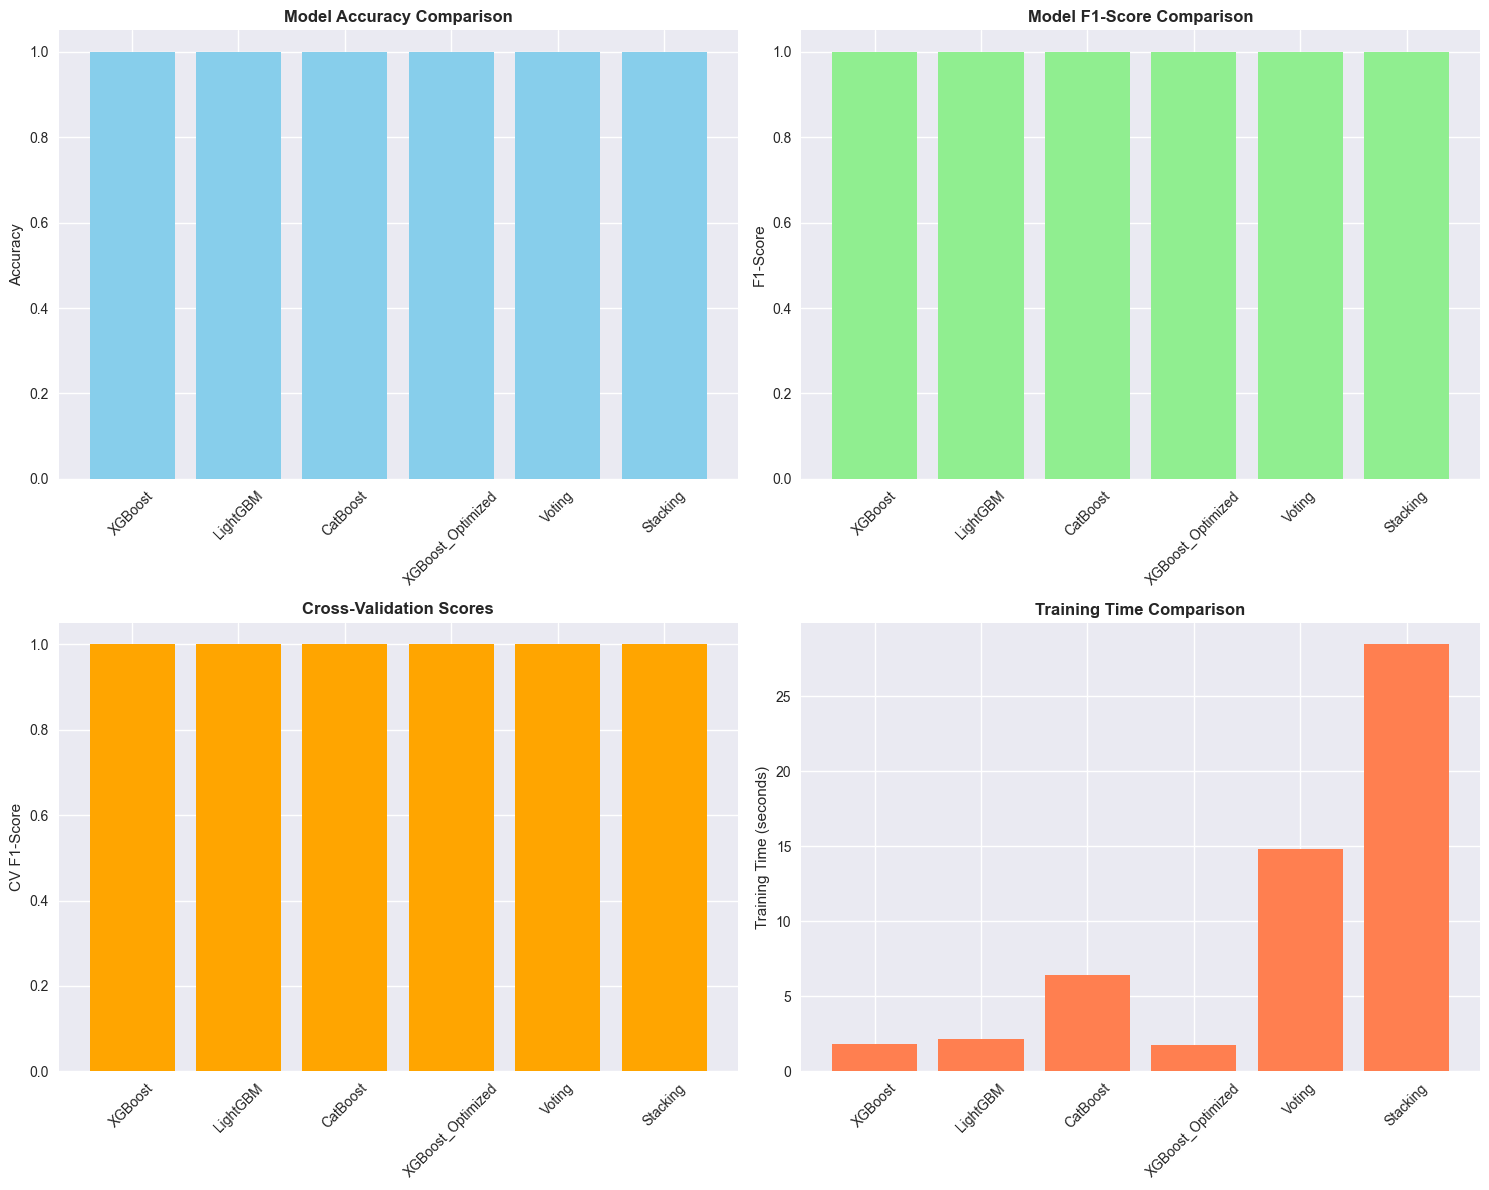

📊 Performance comparison visualization saved!


In [22]:
# Visualize model performance comparison
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Accuracy comparison
axes[0,0].bar(results_df['Model'], results_df['Accuracy'], color='skyblue')
axes[0,0].set_title('Model Accuracy Comparison', fontweight='bold')
axes[0,0].set_ylabel('Accuracy')
axes[0,0].tick_params(axis='x', rotation=45)

# F1-Score comparison
axes[0,1].bar(results_df['Model'], results_df['F1-Score'], color='lightgreen')
axes[0,1].set_title('Model F1-Score Comparison', fontweight='bold')
axes[0,1].set_ylabel('F1-Score')
axes[0,1].tick_params(axis='x', rotation=45)

# Cross-validation scores
axes[1,0].bar(results_df['Model'], results_df['CV Mean'], 
              yerr=results_df['CV Std'], color='orange', capsize=5)
axes[1,0].set_title('Cross-Validation Scores', fontweight='bold')
axes[1,0].set_ylabel('CV F1-Score')
axes[1,0].tick_params(axis='x', rotation=45)

# Training time comparison
axes[1,1].bar(results_df['Model'], results_df['Training Time (s)'], color='coral')
axes[1,1].set_title('Training Time Comparison', fontweight='bold')
axes[1,1].set_ylabel('Training Time (seconds)')
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('../reports/figures/advanced_model_performance_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("📊 Performance comparison visualization saved!")

In [23]:
# Final summary
best_model_name = results_df.iloc[0]['Model']
best_f1_score = results_df.iloc[0]['F1-Score']
best_accuracy = results_df.iloc[0]['Accuracy']

print("🎉 ADVANCED ML ANALYSIS COMPLETE!")
print("=" * 40)
print(f"🏆 Best Model: {best_model_name}")
print(f"📈 Best F1-Score: {best_f1_score:.4f}")
print(f"🎯 Best Accuracy: {best_accuracy:.4f}")
print("\n✅ Key Achievements:")
print("   • Advanced gradient boosting models implemented")
print("   • Hyperparameter optimization with Optuna")
print("   • Ensemble methods for improved performance")
print("   • Model interpretability with SHAP")
print("   • Advanced dimensionality reduction techniques")
print("   • Comprehensive evaluation and visualization")
print("\n🚀 Ready for production deployment!")

🎉 ADVANCED ML ANALYSIS COMPLETE!
🏆 Best Model: XGBoost
📈 Best F1-Score: 1.0000
🎯 Best Accuracy: 1.0000

✅ Key Achievements:
   • Advanced gradient boosting models implemented
   • Hyperparameter optimization with Optuna
   • Ensemble methods for improved performance
   • Model interpretability with SHAP
   • Advanced dimensionality reduction techniques
   • Comprehensive evaluation and visualization

🚀 Ready for production deployment!
